# Information Retrieval

Bag of Words and TF-IDF

In [1]:
# it can be used for making bag of words across the whole corpora
#https://honingds.com/blog/natural-language-processing-with-python/
#https://www.kaggle.com/ngyptr/python-nltk-sentiment-analysis

## Library Imports

In [2]:
# Import Os to get to the root directory
import os
import sys


# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

# Import own functions
from libraries import corpus
from libraries import pdf2text

import warnings
warnings.filterwarnings("ignore")

# Import packages

import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
import string # for punctuation
import gc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from importlib import reload
reload(corpus)

<module 'libraries.corpus' from 'C:\\Users\\laman\\Desktop\\datascience_project\\libraries\\corpus.py'>

## Data Preprocessing

In [4]:
dataset = pdf2text.get_dataset()

2019-07-03 15:54:59,904 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [5]:
dataset.keys()

dict_keys(['#metahash', '0x', 'abbccoin', 'aion', 'apollocurrency', 'ardor', 'ark', 'basicattentiontoken', 'bhpcoin', 'binancecoin', 'bitcoin', 'bitcoingold', 'bitshares', 'bittorrent', 'bytecoin', 'bytom', 'celernetwork', 'chainlink', 'cosmocoin', 'cosmos', 'crypto', 'cryptonex', 'dai', 'dash', 'decentraland', 'dent', 'digixdao', 'dogecoin', 'elastos', 'enjincoin', 'eos', 'ethereum', 'ethereumclassic', 'factom', 'fantom', 'gnosis', 'golem', 'gxchain', 'holo', 'horizen', 'hypercash', 'hyperion', 'icon', 'iexecrlc', 'inocoin', 'iota', 'japancontenttoken', 'komodo', 'latoken', 'lina', 'loopring', 'maidsafecoin', 'maker', 'metal', 'metaverseetp', 'mixin', 'monero', 'nano', 'nebulas', 'nem', 'nexo', 'nkn', 'obyte', 'omisego', 'ontology', 'orbs', 'particl', 'paxosstandardtoken', 'powerledger', 'pundix', 'ravencoin', 'riftoken', 'siacoin', 'singularitynet', 'skycoin', 'solve', 'status', 'steem', 'stellar', 'stratis', 'synthetixnetworktoken', 'tenx', 'tether', 'tezos', 'theta', 'thetafuel', '

In [6]:
len(dataset.keys())

99

In [7]:
makeSentences = True
corpora = corpus.makeCleanCorpus(dataset, lemmatize=True, removePunct=True, removeNums=True,makeSentences=makeSentences, 
                                 removeURL=True, removeChar=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: #metahash
Cleaning: 0x
Cleaning: abbccoin
Cleaning: aion
Cleaning: apollocurrency
Cleaning: ardor
Cleaning: ark
Cleaning: basicattentiontoken
Cleaning: bhpcoin
Cleaning: binancecoin
Cleaning: bitcoin
Cleaning: bitcoingold
Cleaning: bitshares
Cleaning: bittorrent
Cleaning: bytecoin
Cleaning: bytom
Cleaning: celernetwork
Cleaning: chainlink
Cleaning: cosmocoin
Cleaning: cosmos
Cleaning: crypto
Cleaning: cryptonex
Cleaning: dai
Cleaning: dash
Cleaning: decentraland
Cleaning: dent
Cleaning: digixdao
Cleaning: dogecoin
Cleaning: elastos
Cleaning: enjincoin
Cleaning: eos
Cleaning: ethereum
Cleaning: ethereumclassic
Cleaning: factom
Cleaning: fantom
Cleaning: gnosis
Cleaning: golem
Cleaning: gxchain
Cleaning: holo
Cleaning: horizen
Cleaning: hypercash
Cleaning: hyperion
Cleaning: icon
Cleaning: iexecrlc
Cleaning: inocoin
Cleaning: iota
Cleaning: japancontenttoken
Cleaning: komodo
Cleaning: latoken
Cleaning: lina
Cleaning: loopring
Cleaning: maidsafecoin
Cleaning: maker
Cleaning: met

In [8]:
corpora.keys()

dict_keys(['#metahash', '0x', 'abbccoin', 'aion', 'apollocurrency', 'ardor', 'ark', 'basicattentiontoken', 'bhpcoin', 'binancecoin', 'bitcoin', 'bitcoingold', 'bitshares', 'bittorrent', 'bytecoin', 'bytom', 'celernetwork', 'chainlink', 'cosmocoin', 'cosmos', 'crypto', 'cryptonex', 'dai', 'dash', 'decentraland', 'dent', 'digixdao', 'dogecoin', 'elastos', 'enjincoin', 'eos', 'ethereum', 'ethereumclassic', 'factom', 'fantom', 'gnosis', 'golem', 'gxchain', 'holo', 'horizen', 'hypercash', 'hyperion', 'icon', 'iexecrlc', 'inocoin', 'iota', 'japancontenttoken', 'komodo', 'latoken', 'lina', 'loopring', 'maidsafecoin', 'maker', 'metal', 'metaverseetp', 'mixin', 'monero', 'nano', 'nebulas', 'nem', 'nexo', 'nkn', 'obyte', 'omisego', 'ontology', 'orbs', 'particl', 'paxosstandardtoken', 'powerledger', 'pundix', 'ravencoin', 'riftoken', 'siacoin', 'singularitynet', 'skycoin', 'solve', 'status', 'steem', 'stellar', 'stratis', 'synthetixnetworktoken', 'tenx', 'tether', 'tezos', 'theta', 'thetafuel', '

# Tokenization

Tokenization is the first step. The text documents will be broken down into small pieces, in this case words. These tokenized words are called tokens. 

In [167]:
# Start tokenizing the dataset
tokenizer = nltk.tokenize.RegexpTokenizer('\s+', gaps=True)

if makeSentences:
    #############################################
    # Tokenization on sentences
    tokens = [tokenizer.tokenize(s) for s in corpora["adcoin"]]
    # Flatten the list
    tokens = np.reshape(np.concatenate(tokens), -1)
    #############################################
else:
    #############################################
    # Tokenization on whole corpus (no sentences)
    tokens = tokenizer.tokenize(corpora["adcoin"])
    #############################################

print('We have', len(tokens), 'words in total. \n')
print(tokens[5:10])

KeyError: 'adcoin'

# Frequency Distribution

The FreqDist can quickly show how frequent a word occurs in the coprus. Frequency Distribution enables to define the most informative words about the topic of the text document.
https://www.nltk.org/book/ch01.html

In [165]:
from nltk.probability import FreqDist

# Turn corpus into np before unnest the list
# numpy can handle text as well

fdist = FreqDist(tokens)

fdist.most_common(10)

[('oracle', 156),
 ('data', 123),
 ('oracles', 98),
 ('chainlink', 88),
 ('contracts', 63),
 ('smart', 61),
 ('nodes', 58),
 ('contract', 56),
 ('security', 52),
 ('offchain', 46)]

In [11]:
import matplotlib.pyplot as plt

fdist.plot(30,cumulative=False)
plt.show()

<Figure size 640x480 with 1 Axes>

# N-grams

N-grams is a sequence of N words. Extracting a list of word pairs from a text is known as bigrams. N-gram model predicts the occurrence of a word based on the occurrence of its N – 1 previous words. So here we are answering the question – how far back in the history of a sequence of words should we go to predict the next word?

https://blog.xrds.acm.org/2017/10/introduction-n-grams-need/

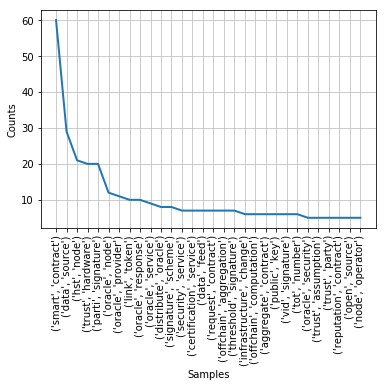

In [12]:
# n=2 - bigram model is the probability of a word based only on its previous word.

from nltk import bigrams, ngrams
bigrams_tokens = bigrams(tokens)
fdist_bigrams = FreqDist(list(bigrams_tokens))
fdist_bigrams.plot(30,cumulative=False)
plt.show()

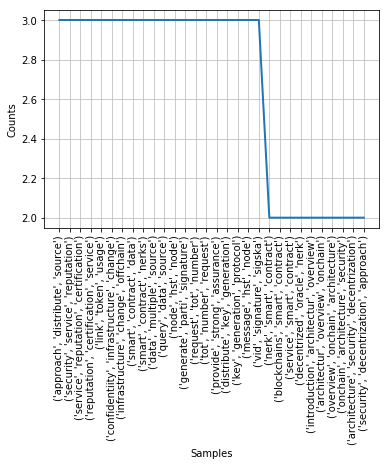

In [13]:
# n=3
trigrams_tokens = ngrams(tokens, 3)
fdist_trigrams = FreqDist(list(trigrams_tokens))
fdist_trigrams.plot(30,cumulative=False)
plt.show()

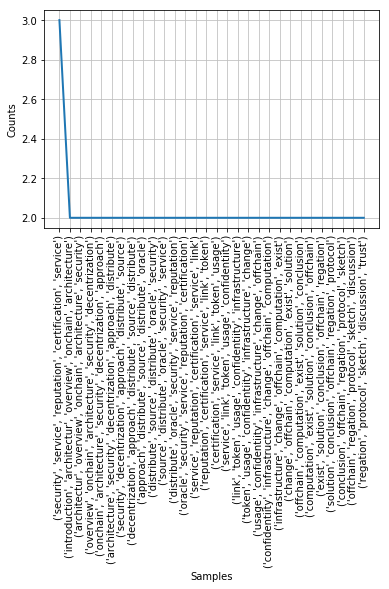

In [14]:
# n=5
grams5_tokens = ngrams(tokens, 5)
fdist_grams5 = FreqDist(list(grams5_tokens))
fdist_grams5.plot(30,cumulative=False)
plt.show()

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
print(vect)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [16]:
# use TreeankWordTokenizer
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
vect.set_params(tokenizer=tokenizer.tokenize)

# remove English stop words
vect.set_params(stop_words='english')

# include 1-grams and 2-grams
vect.set_params(ngram_range=(1, 2))

# ignore terms that appear in more than 50% of the documents
vect.set_params(max_df=0.5)

# only keep terms that appear in at least 2 documents
vect.set_params(min_df=2)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=2,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x0000020526E54780>>,
        vocabulary=None)

In [17]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(tokens)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

# see final the clean data
print (train_data_features.shape)

(5884, 1622)


# BAG OF WORDS

A popular and simple method of feature extraction with text data is called the bag-of-words model of text. The feature_extraction module from scikit-learn to create bag-of-words features is used below.

In [18]:
# Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

chainlink = [corpora['chainlink']]
# Transforms the data into a bag of words
count_train = count_vec.fit(corpora["chainlink"])
bag_of_words = count_vec.transform(corpora["chainlink"])

# Print the first 10 features of the count_vec
print("Every feature:\n{}".format(count_vec.get_feature_names()))
print("\nEvery 3rd feature:\n{}".format(count_vec.get_feature_names()[::3]))

Every feature:


['abhiram', 'ability', 'absolute', 'abstrac', 'abstraction', 'academic', 'accept', 'acceptable', 'accepted', 'access', 'accessible', 'accommodate', 'accompany', 'accomplish', 'account', 'accuracy', 'achieve', 'acle', 'acous', 'action', 'activate', 'activation', 'active', 'actively', 'activity', 'actu', 'actuly', 'adapter', 'add', 'addition', 'additionly', 'address', 'adequate', 'adjunct', 'administer', 'administrative', 'administrator', 'adopt', 'advance', 'adver', 'adversary', 'advisor', 'advocate', 'afterward', 'agenda', 'agg', 'agga', 'aggre', 'aggregate', 'aggregation', 'aggressively', 'agree', 'agreement', 'aim', 'alternatively', 'ample', 'andor', 'answer', 'answersparticularly', 'anticipate', 'apparent', 'appendonly', 'application', 'applicationoriented', 'approach', 'appropriately', 'approxi', 'arbitrarily', 'architectur', 'architecture', 'archive', 'area', 'argument', 'arises', 'arm', 'arrive', 'article', 'arxiv', 'asset', 'assign', 'assignment', 'associate', 'assume', 'assumes


Every 3rd feature:
['abhiram', 'abstrac', 'accept', 'access', 'accompany', 'accuracy', 'acous', 'activation', 'activity', 'adapter', 'additionly', 'adjunct', 'administrator', 'adver', 'advocate', 'agg', 'aggregate', 'agree', 'alternatively', 'answer', 'apparent', 'applicationoriented', 'approxi', 'architecture', 'argument', 'arrive', 'asset', 'associate', 'assumption', 'asynchronous', 'attach', 'attain', 'attest', 'augur', 'authenticity', 'authorize', 'automaticly', 'average', 'aware', 'bancing', 'basic', 'behave', 'belonging', 'benignly', 'bidding', 'bind', 'blockchain', 'board', 'bound', 'breach', 'broadcast', 'buggy', 'built', 'bulletinboard', 'buterin', 'canetti', 'capable', 'card', 'cat', 'cculate', 'cculating', 'centive', 'certifica', 'chain', 'channel', 'cheaper', 'cheese', 'chlenging', 'chosen', 'circle', 'claim', 'cled', 'clique', 'clude', 'cod', 'col', 'collective', 'com', 'commensurate', 'commitment', 'commits', 'commu', 'community', 'comparison', 'compensation', 'complemen

In [19]:
#Vocabulary and vocabulary ID

print("Vocabulary size: {}".format(len(count_train.vocabulary_)))
print("Vocabulary content:\n {}".format(count_train.vocabulary_))

Vocabulary size: 1616
Vocabulary content:


 {'decentrized': 375, 'nerk': 944, 'smart': 1374, 'contract': 309, 'poise': 1076, 'revolutionize': 1268, 'industry': 741, 'replace': 1231, 'tradition': 1489, 'leg': 834, 'agreement': 52, 'centrly': 185, 'automate': 106, 'digit': 425, 'performance': 1049, 'verification': 1557, 'execution': 538, 'rely': 1224, 'manu': 873, 'action': 19, 'party': 1033, 'programmat': 1137, 'icly': 707, 'retrieves': 1263, 'update': 1537, 'relevant': 1222, 'change': 191, 'underlie': 1521, 'consensus': 294, 'protocol': 1156, 'blockchains': 139, 'support': 1430, 'native': 936, 'communication': 245, 'extern': 559, 'solution': 1383, 'problem': 1123, 'introduce': 788, 'functionity': 635, 'cled': 213, 'oracle': 997, 'provide': 1159, 'connectivity': 293, 'exist': 540, 'centrized': 184, 'service': 1329, 'single': 1362, 'point': 1075, 'failure': 569, 'secure': 1303, 'paper': 1020, 'scribe': 1299, 'onchain': 981, 'compnts': 262, 'gain': 637, 'software': 1381, 'power': 1090, 'node': 952, 'simple': 1357, 'data': 367, 'ag

In [20]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print (vocab)

['abhiram', 'ability', 'absolute', 'abstrac', 'abstraction', 'academic', 'accept', 'acceptable', 'accepted', 'access', 'accessible', 'accommodate', 'accompany', 'accomplish', 'account', 'accuracy', 'achieve', 'acle', 'acous', 'action', 'activate', 'activation', 'active', 'actively', 'activity', 'actu', 'actuly', 'adapter', 'add', 'addition', 'additionly', 'address', 'adequate', 'adjunct', 'administer', 'administrative', 'administrator', 'adopt', 'advance', 'adver', 'adversary', 'advisor', 'advocate', 'afterward', 'agenda', 'agg', 'agga', 'aggre', 'aggregate', 'aggregation', 'aggressively', 'agree', 'agreement', 'aim', 'alternatively', 'ample', 'andor', 'answer', 'answersparticularly', 'anticipate', 'apparent', 'appendonly', 'application', 'applicationoriented', 'approach', 'appropriately', 'approxi', 'arbitrarily', 'architectur', 'architecture', 'archive', 'area', 'argument', 'arises', 'arm', 'arrive', 'article', 'arxiv', 'asset', 'assign', 'assignment', 'associate', 'assume', 'assumes

Print the counts of each word in the vocabulary:

In [21]:
# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print (count, tag)

1 abhiram
8 ability
1 absolute
1 abstrac
4 abstraction
1 academic
7 accept
2 acceptable
2 accepted
1 access
1 accessible
1 accommodate
1 accompany
1 accomplish
2 account
1 accuracy
10 achieve
1 acle
1 acous
1 action
1 activate
1 activation
1 active
1 actively
2 activity
1 actu
1 actuly
13 adapter
2 add
7 addition
11 additionly
4 address
1 adequate
1 adjunct
1 administer
1 administrative
2 administrator
2 adopt
1 advance
1 adver
12 adversary
1 advisor
1 advocate
1 afterward
1 agenda
4 agg
1 agga
1 aggre
16 aggregate
24 aggregation
1 aggressively
2 agree
13 agreement
6 aim
1 alternatively
1 ample
2 andor
24 answer
1 answersparticularly
2 anticipate
1 apparent
1 appendonly
15 application
1 applicationoriented
29 approach
1 appropriately
1 approxi
1 arbitrarily
5 architectur
15 architecture
1 archive
1 area
1 argument
1 arises
1 arm
3 arrive
1 article
2 arxiv
1 asset
4 assign
5 assignment
2 associate
5 assume
1 assumes
5 assumption
9 assurance
1 assure
3 asynchronous
1 ator
6 att
1 attach


3 innovative
1 innovativetechnologyforcpubasedattestationandseing
6 input
2 insight
2 inspect
6 instance
1 instancespecific
1 instruc
7 instruction
1 instructionset
1 instructive
1 instrument
1 insurable
5 insurance
1 insured
9 integrity
1 intel
3 intend
1 intention
4 interact
3 interaction
1 interactive
1 intercommunicate
2 interested
3 interface
1 interfacing
1 interfere
1 intermediate
5 internation
1 internet
1 intrigue
2 introduce
2 introduces
3 introduction
1 intuitively
1 investment
1 invid
1 invocation
6 involve
4 involves
1 irrespective
1 isbn
1 island
1 isolated
1 isolation
4 issue
1 itative
1 ited
1 itize
1 ity
1 ization
1 job
1 jointly
1 journ
2 july
1 justify
2 ken
35 key
1 keygeneration
2 keypair
1 keyshare
1 keyst
3 kind
2 knowledge
1 kothapli
1 lab
3 lack
1 laid
4 language
6 large
2 launch
1 lay
2 lead
2 leaf
1 leak
1 leakage
2 ledger
1 leg
1 legacy
1 legitimately
1 length
1 lesson
1 letterwere
5 level
2 leverage
1 lie
2 limit
1 limitation
3 limited
14 link
1 lion
1 list

1 vidate
1 vidates
2 vidation
1 vidi
1 vidii
1 vidity
1 vidlooking
3 view
1 virgin
1 virtuous
1 visibility
5 visible
1 vision
3 visit
1 vitik
1 voting
14 vue
1 vuea
1 vued
4 vues
1 vulnerabili
1 vulnerability
1 vulnerable
9 wait
1 ward
1 ware
1 warehouse
1 weak
1 weaken
2 weakens
4 web
1 website
3 weight
3 wellfunctioning
1 white
1 whitehat
1 wikiwikiwhitepaper
1 will
2 window
3 witness
6 work
1 workflow
2 workshop
1 worrisome
1 worthy
1 write
1 xzp
1 yellow
1 yesno
3 yield
1 zksnarks


# bitcoin

In [22]:
import collections, re

top_1 = corpora["bitcoin"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_1]
bagsofwords[0]

Counter({'bitcoin': 1,
         'electronic': 1,
         'cash': 1,
         'satoshi': 1,
         'satoshingmxcom': 1})

In [23]:
bagsofwords[1]

Counter({'purely': 1,
         'peertopeer': 1,
         'version': 1,
         'electronic': 1,
         'cash': 1,
         'online': 1,
         'payment': 1,
         'directly': 1,
         'party': 1,
         'financial': 1,
         'institution': 1})

In [24]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'transaction': 69, 'block': 65, 'hash': 45, 'node': 38, 'chain': 27, 'attacker': 23, 'nerk': 21, 'proofofwork': 18, 'owner': 17, 'work': 16, 'coin': 16, 'long': 15, 'hst': 15, 'key': 13, 'payment': 12, 'trust': 12, 'public': 12, 'party': 11, 'timestamp': 11, 'probability': 11, 'proof': 9, 'problem': 8, 'change': 8, 'verify': 8, 'time': 8, 'nonce': 8, 'catch': 8, 'header': 8, 'signature': 7, 'power': 7, 'majority': 7, 'add': 7, 'prev': 7, 'incentive': 7, 'link': 7, 'sender': 7, 'electronic': 6, 'solution': 6, 'control': 6, 'generate': 6, 'broadcast': 6, 'accept': 6, 'mint': 6, 'double': 6, 'receive': 6, 'number': 6, 'branch': 6, 'privacy': 6, 'peertopeer': 5, 'require': 5, 'propose': 5, 'model': 5, 'increase': 5, 'server': 5, 'previous': 5, 'item': 5, 'input': 5, 'poisson': 5, 'doublespending': 4, 'redo': 4, 'effort': 4, 'base': 4, 'cost': 4, 'accepted': 4, 'digital': 4, 'payee': 4, 'include': 4, 'average': 4, 'extend': 4, 'reach': 4, 'start': 4, 'combine': 4, 'root': 4, 'sum':

In [25]:
count = CountVectorizer()
docs = np.array(corpora["bitcoin"])
bag = count.fit_transform(docs)
print(bag)

  (0, 418)	1
  (0, 417)	1
  (0, 62)	1
  (0, 162)	1
  (0, 43)	1
  (1, 247)	1
  (1, 194)	1
  (1, 322)	1
  (1, 139)	1
  (1, 326)	1
  (1, 309)	1
  (1, 521)	1
  (1, 327)	1
  (1, 371)	1
  (1, 62)	1
  (1, 162)	1
  (2, 151)	1
  (2, 349)	1
  (2, 401)	1
  (2, 504)	1
  (2, 271)	1
  (2, 40)	1
  (2, 275)	1
  (2, 450)	1
  (2, 366)	1
  :	:
  (137, 431)	1
  (138, 21)	1
  (138, 93)	1
  (138, 8)	1
  (138, 158)	1
  (138, 44)	1
  (138, 425)	1
  (138, 91)	1
  (138, 424)	1
  (138, 82)	1
  (139, 109)	1
  (139, 127)	1
  (139, 221)	1
  (139, 435)	1
  (140, 377)	1
  (141, 115)	1
  (141, 365)	1
  (141, 260)	1
  (141, 368)	1
  (142, 21)	1
  (142, 352)	1
  (143, 20)	1
  (143, 486)	1
  (143, 252)	1
  (143, 354)	1


# ethereum

In [26]:
top_2 = corpora["ethereum"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_2]
bagsofwords[0]

Counter({'ethereum': 1})

In [27]:
bagsofwords[1]

Counter({'extgeneration': 1,
         'mart': 1,
         'contract': 1,
         'decentralize': 1,
         'application': 1,
         'platform': 1,
         'documentation': 2,
         'docschatabsvg': 1,
         'introductory': 1,
         'paper': 1,
         'introduce': 1,
         'launch': 1,
         'maintain': 1})

In [28]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'transaction': 130, 'block': 128, 'contract': 125, 'state': 60, 'protocol': 58, 'code': 54, 'node': 54, 'provide': 53, 'miner': 52, 'blockchain': 43, 'data': 43, 'decentralize': 41, 'application': 39, 'account': 39, 'time': 36, 'gas': 35, 'include': 34, 'execution': 32, 'ether': 32, 'currency': 30, 'message': 30, 'fee': 30, 'tree': 29, 'implement': 27, 'create': 27, 'storage': 27, 'mining': 27, 'nerk': 25, 'follow': 24, 'transition': 23, 'exist': 23, 'work': 23, 'sender': 23, 'hash': 23, 'number': 23, 'function': 21, 'change': 21, 'require': 21, 'valid': 21, 'computational': 20, 'problem': 20, 'set': 20, 'add': 20, 'store': 20, 'cost': 20, 'script': 20, 'process': 19, 'attacker': 19, 'financial': 18, 'key': 18, 'proof': 18, 'return': 18, 'send': 18, 'large': 18, 'pay': 18, 'computation': 17, 'step': 17, 'case': 17, 'unit': 17, 'loop': 17, 'user': 16, 'byte': 16, 'asset': 15, 'consensus': 15, 'concept': 15, 'algorithm': 15, 'mechanism': 15, 'signature': 15, 'check': 15, 'develo

In [29]:
count = CountVectorizer()
docs = np.array(corpora["ethereum"])
bag = count.fit_transform(docs)
print(bag)

  (0, 500)	1
  (1, 865)	1
  (1, 817)	1
  (1, 774)	1
  (1, 997)	1
  (1, 777)	1
  (1, 421)	1
  (1, 424)	2
  (1, 1040)	1
  (1, 54)	1
  (1, 357)	1
  (1, 302)	1
  (1, 876)	1
  (1, 543)	1
  (2, 307)	1
  (2, 791)	1
  (2, 201)	1
  (2, 128)	1
  (2, 773)	1
  (2, 772)	1
  (2, 100)	1
  (2, 1290)	1
  (2, 72)	1
  (2, 404)	1
  (2, 343)	1
  :	:
  (534, 1012)	1
  (535, 486)	1
  (535, 1435)	1
  (536, 486)	1
  (536, 1435)	1
  (537, 1013)	1
  (537, 642)	1
  (538, 29)	1
  (538, 629)	1
  (538, 1418)	1
  (539, 570)	1
  (539, 1098)	1
  (539, 876)	1
  (540, 119)	1
  (541, 644)	1
  (541, 1435)	1
  (542, 1353)	2
  (542, 1538)	1
  (542, 138)	1
  (542, 1537)	1
  (542, 862)	1
  (542, 1435)	1
  (542, 1376)	1
  (542, 681)	1
  (542, 997)	1


# xrp

In [30]:
top_3 = corpora["xrp"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_3]
bagsofwords[0]

Counter({'ripple': 1,
         'protocol': 1,
         'consensus': 2,
         'algorithm': 1,
         'davidripplecom': 1,
         'nyoungsnyuedu': 1,
         'arthurripplecom': 1,
         'sever': 1,
         'gorithms': 1,
         'exist': 1,
         'specificly': 1,
         'pertains': 1,
         'distribute': 1,
         'payment': 1,
         'suffer': 1,
         'high': 1,
         'latency': 1,
         'induced': 1,
         'requirement': 1,
         'node': 1,
         'nerk': 1,
         'communicate': 1,
         'synchronously': 1})

In [31]:
bagsofwords[1]

Counter({'work': 1,
         'consensus': 1,
         'gorithm': 1,
         'circumvents': 1,
         'requirement': 1,
         'utilize': 1,
         'collectivelytrusted': 1,
         'subnerks': 1,
         'large': 1,
         'nerk': 1})

In [32]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'consensus': 89, 'node': 73, 'nerk': 51, 'transaction': 51, 'agreement': 27, 'ledger': 27, 'correctness': 26, 'process': 23, 'bound': 23, 'distribute': 18, 'require': 18, 'server': 18, 'round': 18, 'set': 17, 'gorithm': 16, 'failure': 16, 'user': 15, 'reach': 15, 'ripple': 14, 'problem': 14, 'work': 13, 'probability': 13, 'latency': 11, 'utility': 11, 'low': 11, 'size': 11, 'case': 11, 'member': 10, 'achieve': 10, 'face': 9, 'correct': 9, 'guarantee': 9, 'number': 9, 'lastclosed': 9, 'vote': 9, 'protocol': 8, 'payment': 8, 'result': 8, 'convergence': 8, 'threshold': 8, 'consen': 8, 'sus': 8, 'apply': 8, 'faulty': 8, 'vues': 8, 'gorithms': 7, 'high': 7, 'large': 7, 'trust': 7, 'micious': 7, 'include': 7, 'order': 7, 'represent': 7, 'note': 7, 'strong': 7, 'fork': 7, 'clique': 7, 'requirement': 6, 'addition': 6, 'connectivity': 6, 'previous': 6, 'heuristic': 6, 'fraudulent': 6, 'ing': 6, 'long': 6, 'message': 6, 'met': 6, 'time': 6, 'algorithm': 5, 'exist': 5, 'maintain': 5, 'fo

In [33]:
count = CountVectorizer()
docs = np.array(corpora["xrp"])
bag = count.fit_transform(docs)
print(bag)

  (0, 589)	1
  (0, 92)	1
  (0, 383)	1
  (0, 387)	1
  (0, 510)	1
  (0, 295)	1
  (0, 326)	1
  (0, 266)	1
  (0, 581)	1
  (0, 420)	1
  (0, 169)	1
  (0, 427)	1
  (0, 559)	1
  (0, 200)	1
  (0, 253)	1
  (0, 534)	1
  (0, 30)	1
  (0, 397)	1
  (0, 133)	1
  (0, 19)	1
  (0, 106)	2
  (0, 469)	1
  (0, 515)	1
  (1, 323)	1
  (1, 575)	1
  :	:
  (178, 462)	1
  (178, 622)	1
  (179, 38)	1
  (179, 16)	1
  (180, 449)	1
  (180, 586)	1
  (180, 21)	1
  (180, 97)	1
  (180, 169)	1
  (181, 283)	1
  (181, 215)	1
  (181, 458)	1
  (181, 169)	1
  (181, 106)	1
  (182, 320)	1
  (183, 611)	1
  (183, 58)	1
  (183, 213)	1
  (183, 106)	1
  (184, 622)	1
  (185, 413)	1
  (185, 639)	1
  (185, 106)	1
  (186, 449)	1
  (186, 169)	1


# eos

In [34]:
top_4 = corpora["eos"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_4]
bagsofwords[0]

Counter({'eosio': 2,
         'technical': 1,
         'white': 1,
         'paper': 1,
         'software': 1,
         'introduces': 1,
         'blockchain': 1,
         'architecture': 1,
         'design': 1,
         'enable': 1,
         'vertical': 1,
         'horizontal': 1,
         'scale': 1,
         'decentralize': 1,
         'application': 1})

In [35]:
bagsofwords[1]

Counter({'achieve': 1,
         'create': 1,
         'operating': 1,
         'systemlike': 1,
         'construct': 1,
         'application': 1,
         'built': 1})

In [36]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'block': 122, 'account': 84, 'blockchain': 78, 'producer': 74, 'transaction': 72, 'eosio': 66, 'application': 66, 'software': 62, 'permission': 45, 'token': 36, 'state': 35, 'user': 34, 'process': 34, 'proof': 28, 'require': 26, 'parallel': 24, 'time': 22, 'include': 18, 'change': 18, 'bandwidth': 17, 'free': 16, 'define': 16, 'holder': 16, 'key': 15, 'developer': 15, 'blockchains': 15, 'computational': 15, 'enables': 15, 'performance': 14, 'algorithm': 14, 'constitution': 14, 'computation': 14, 'schedule': 13, 'usage': 13, 'cost': 13, 'platform': 13, 'number': 13, 'produce': 13, 'communication': 12, 'content': 12, 'recovery': 12, 'pay': 12, 'code': 12, 'exchange': 12, 'deliver': 12, 'provide': 11, 'business': 11, 'data': 11, 'support': 11, 'consensus': 11, 'level': 11, 'storage': 11, 'fork': 11, 'chain': 11, 'store': 11, 'signature': 11, 'owner': 11, 'white': 10, 'paper': 10, 'database': 10, 'group': 10, 'subjective': 10, 'capacity': 10, 'case': 10, 'contract': 10, 'vote': 10

In [37]:
count = CountVectorizer()
docs = np.array(corpora["eos"])
bag = count.fit_transform(docs)
print(bag)

  (0, 51)	1
  (0, 235)	1
  (0, 803)	1
  (0, 441)	1
  (0, 946)	1
  (0, 310)	1
  (0, 259)	1
  (0, 57)	1
  (0, 91)	1
  (0, 500)	1
  (0, 847)	1
  (0, 644)	1
  (0, 962)	1
  (0, 885)	1
  (0, 320)	2
  (1, 104)	1
  (1, 194)	1
  (1, 883)	1
  (1, 630)	1
  (1, 219)	1
  (1, 18)	1
  (1, 51)	1
  (2, 144)	1
  (2, 212)	1
  (2, 804)	1
  :	:
  (352, 30)	1
  (352, 385)	1
  (352, 688)	1
  (352, 769)	1
  (352, 171)	1
  (352, 714)	1
  (352, 343)	1
  (352, 173)	1
  (352, 887)	1
  (352, 259)	1
  (352, 91)	1
  (352, 847)	1
  (352, 320)	1
  (353, 255)	1
  (353, 293)	1
  (353, 846)	1
  (353, 802)	1
  (353, 399)	1
  (353, 95)	1
  (353, 440)	1
  (353, 403)	1
  (353, 51)	1
  (353, 235)	1
  (353, 91)	1
  (353, 847)	1


# binancecoin

In [38]:
top_5 = corpora["binancecoin"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_5]
bagsofwords[0]

Counter({'exchange': 3,
         'intro': 2,
         'problem': 1,
         'match': 1,
         'engine': 1,
         'feature': 1,
         'rollout': 1,
         'coin': 2,
         'device': 1,
         'coverage': 1,
         'multilingual': 1,
         'support': 1,
         'preview': 1,
         'revenue': 1,
         'model': 1,
         'allocation': 1,
         'schedule': 1,
         'burn': 1,
         'vest': 1,
         'plan': 1,
         'team': 2,
         'fund': 1,
         'usage': 1,
         'chief': 1,
         'architect': 1,
         'engineering': 1,
         'director': 2,
         'operation': 1,
         'investor': 1,
         'advisor': 1,
         'risk': 1,
         'security': 1,
         'market': 1,
         'competition': 1,
         'view': 1,
         'fundamentally': 1,
         'type': 1,
         'deal': 2,
         'fiat': 1,
         'currency': 1,
         'purely': 1,
         'crypto': 1})

In [39]:
bagsofwords[1]

Counter({'focus': 1})

In [40]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'exchange': 44, 'team': 21, 'trading': 18, 'work': 17, 'fee': 17, 'coin': 14, 'investor': 14, 'year': 14, 'security': 12, 'experience': 12, 'platform': 12, 'client': 12, 'cofounder': 12, 'data': 11, 'crypto': 10, 'company': 10, 'support': 9, 'user': 9, 'engine': 8, 'market': 8, 'financial': 8, 'trader': 8, 'blockchain': 8, 'ceo': 8, 'match': 7, 'director': 7, 'time': 7, 'industry': 7, 'service': 7, 'include': 7, 'july': 7, 'lead': 7, 'responsible': 7, 'revenue': 6, 'big': 6, 'base': 6, 'future': 6, 'built': 6, 'high': 6, 'large': 6, 'founder': 6, 'product': 6, 'problem': 5, 'plan': 5, 'risk': 5, 'focus': 5, 'finance': 5, 'number': 5, 'poor': 5, 'tech': 5, 'order': 5, 'follow': 5, 'provide': 5, 'native': 5, 'english': 5, 'start': 5, 'prior': 5, 'architect': 4, 'operation': 4, 'competition': 4, 'initial': 4, 'development': 4, 'standard': 4, 'ensure': 4, 'partner': 4, 'global': 4, 'list': 4, 'release': 4, 'token': 4, 'project': 4, 'investment': 4, 'firm': 4, 'business': 4, 'core'

In [41]:
count = CountVectorizer()
docs = np.array(corpora["binancecoin"])
bag = count.fit_transform(docs)
print(bag)

  (0, 130)	1
  (0, 401)	1
  (0, 137)	1
  (0, 201)	1
  (0, 144)	2
  (0, 521)	1
  (0, 219)	1
  (0, 535)	1
  (0, 102)	1
  (0, 311)	1
  (0, 441)	1
  (0, 428)	1
  (0, 10)	1
  (0, 266)	1
  (0, 345)	1
  (0, 162)	2
  (0, 181)	1
  (0, 28)	1
  (0, 79)	1
  (0, 529)	1
  (0, 218)	1
  (0, 501)	2
  (0, 372)	1
  (0, 534)	1
  (0, 68)	1
  :	:
  (172, 373)	1
  (172, 501)	1
  (172, 191)	1
  (173, 202)	1
  (173, 102)	1
  (174, 314)	1
  (174, 107)	1
  (174, 145)	1
  (174, 99)	1
  (174, 11)	1
  (174, 101)	1
  (174, 428)	1
  (175, 356)	1
  (175, 76)	1
  (175, 478)	1
  (175, 405)	1
  (175, 391)	1
  (175, 272)	1
  (175, 411)	1
  (175, 511)	1
  (175, 424)	1
  (175, 421)	1
  (175, 247)	1
  (175, 194)	1
  (175, 501)	1


# tether

In [42]:
top_6 = corpora["tether"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_6]
bagsofwords[0]

Counter({'tether': 1, 'currency': 1, 'blockchain': 1})

In [43]:
bagsofwords[1]

Counter({'digital': 1,
         'token': 1,
         'fiat': 1,
         'currency': 1,
         'provide': 1,
         'individual': 1,
         'organization': 1,
         'robust': 1,
         'decentralize': 1,
         'method': 1,
         'exchange': 1,
         'familiar': 1,
         'accounting': 1,
         'unit': 1})

In [44]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'tether': 69, 'exchange': 65, 'user': 57, 'fiat': 39, 'reserve': 36, 'currency': 35, 'asset': 32, 'bank': 29, 'wallet': 27, 'account': 27, 'process': 26, 'limited': 25, 'audit': 24, 'blockchain': 23, 'risk': 22, 'cryptocurrency': 21, 'issue': 21, 'proof': 20, 'exist': 17, 'business': 17, 'circulation': 16, 'market': 15, 'time': 15, 'balance': 15, 'secure': 14, 'financial': 14, 'digital': 13, 'token': 13, 'implementation': 13, 'store': 13, 'party': 13, 'database': 13, 'decentralize': 12, 'price': 12, 'merchant': 12, 'trust': 12, 'service': 12, 'provide': 11, 'method': 11, 'technology': 11, 'individual': 10, 'deposit': 10, 'approach': 10, 'total': 10, 'fund': 9, 'held': 9, 'create': 9, 'payment': 9, 'cryptocurrencies': 9, 'banking': 9, 'transfer': 9, 'unit': 8, 'innovation': 8, 'weakness': 8, 'solvency': 8, 'flaw': 8, 'compliance': 8, 'transparency': 8, 'legacy': 8, 'include': 8, 'ie': 8, 'custodian': 8, 'liquidity': 8, 'number': 8, 'report': 8, 'point': 8, 'tusd': 8, 'transact'

In [45]:
count = CountVectorizer()
docs = np.array(corpora["tether"])
bag = count.fit_transform(docs)
print(bag)

  (0, 81)	1
  (0, 205)	1
  (0, 770)	1
  (1, 818)	1
  (1, 9)	1
  (1, 305)	1
  (1, 289)	1
  (1, 481)	1
  (1, 218)	1
  (1, 684)	1
  (1, 530)	1
  (1, 394)	1
  (1, 606)	1
  (1, 311)	1
  (1, 778)	1
  (1, 238)	1
  (1, 205)	1
  (2, 431)	1
  (2, 346)	1
  (2, 691)	1
  (2, 200)	1
  (2, 55)	1
  (2, 82)	1
  (2, 401)	1
  (3, 44)	1
  :	:
  (233, 266)	1
  (233, 812)	1
  (233, 294)	1
  (233, 588)	2
  (233, 334)	1
  (233, 416)	1
  (233, 597)	1
  (233, 667)	1
  (233, 44)	1
  (233, 766)	1
  (233, 417)	1
  (233, 45)	1
  (233, 218)	1
  (233, 778)	2
  (233, 238)	1
  (233, 770)	1
  (234, 57)	1
  (234, 76)	1
  (234, 351)	1
  (234, 491)	1
  (234, 848)	1
  (234, 820)	1
  (234, 167)	1
  (234, 677)	1
  (234, 638)	1


# tron

In [46]:
top_7 = corpora["tron"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_7]
bagsofwords[0]

Counter({'advanced': 1,
         'decentralize': 1,
         'blockchain': 1,
         'platform': 1,
         'version': 2,
         'foundation': 1})

In [47]:
bagsofwords[1]

Counter({'introduction': 1})

In [48]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'block': 79, 'nerk': 69, 'transaction': 66, 'token': 65, 'account': 64, 'contract': 58, 'reward': 48, 'vote': 43, 'smart': 41, 'bandwidth': 39, 'total': 30, 'trc': 28, 'point': 27, 'developer': 25, 'address': 23, 'key': 23, 'create': 22, 'data': 21, 'cost': 21, 'description': 21, 'hash': 20, 'range': 20, 'witness': 19, 'eg': 19, 'blockchain': 18, 'function': 18, 'proposal': 17, 'transfer': 17, 'round': 17, 'modify': 17, 'byte': 16, 'energy': 16, 'candidate': 16, 'fee': 15, 'parameter': 15, 'public': 14, 'time': 14, 'pair': 14, 'freeze': 14, 'set': 14, 'node': 14, 'storage': 13, 'support': 13, 'number': 13, 'code': 13, 'header': 12, 'consensus': 12, 'structure': 12, 'trading': 12, 'limit': 12, 'decentralize': 11, 'asset': 11, 'wallet': 11, 'application': 11, 'type': 11, 'mechanism': 11, 'user': 11, 'private': 11, 'development': 11, 'balance': 11, 'creation': 10, 'deployment': 10, 'dynamic': 10, 'propose': 10, 'protocol': 10, 'interface': 10, 'follow': 10, 'bytes': 10, 'uint': 1

In [49]:
count = CountVectorizer()
docs = np.array(corpora["tron"])
bag = count.fit_transform(docs)
print(bag)

  (0, 369)	1
  (0, 908)	2
  (0, 617)	1
  (0, 84)	1
  (0, 224)	1
  (0, 27)	1
  (1, 467)	1
  (2, 911)	1
  (3, 69)	1
  (4, 414)	1
  (5, 862)	1
  (5, 834)	1
  (5, 832)	1
  (5, 828)	1
  (5, 732)	1
  (5, 727)	1
  (5, 825)	1
  (5, 664)	1
  (5, 722)	1
  (5, 480)	1
  (5, 419)	1
  (5, 403)	1
  (5, 923)	2
  (5, 135)	1
  (5, 408)	1
  :	:
  (449, 264)	1
  (450, 499)	1
  (450, 337)	1
  (450, 816)	1
  (450, 535)	1
  (450, 291)	1
  (450, 119)	1
  (450, 770)	1
  (450, 446)	1
  (450, 733)	1
  (450, 165)	1
  (450, 560)	1
  (450, 84)	2
  (451, 810)	1
  (451, 292)	1
  (451, 221)	1
  (451, 235)	1
  (451, 678)	1
  (451, 845)	1
  (451, 143)	1
  (451, 195)	1
  (451, 559)	1
  (451, 851)	1
  (451, 4)	1
  (451, 224)	1


# stellar

In [50]:
top_8 = corpora["stellar"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_8]
bagsofwords[0]

Counter({'consensus': 3,
         'protocol': 1,
         'federate': 2,
         'internetlevel': 1,
         'paper': 1,
         'introduces': 1,
         'model': 1,
         'agreement': 1})

In [51]:
bagsofwords[1]

Counter({'achieves': 1,
         'robustness': 1,
         'quorum': 2,
         'slicesindividual': 1,
         'trust': 1,
         'decision': 1,
         'node': 1,
         'determine': 1,
         'systemlevel': 1})

In [52]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'node': 488, 'quorum': 189, 'set': 139, 'intact': 123, 'ballot': 115, 'statement': 110, 'vote': 109, 'protocol': 105, 'accept': 96, 'message': 74, 'consensus': 69, 'intersection': 63, 'slice': 62, 'theorem': 58, 'commit': 58, 'illbehaved': 57, 'slot': 54, 'safety': 52, 'confirm': 50, 'agreement': 47, 'wellbehaved': 44, 'ratify': 41, 'accepted': 37, 'liveness': 35, 'state': 34, 'definition': 32, 'federate': 31, 'nominate': 31, 'voting': 30, 'figure': 30, 'proof': 29, 'high': 29, 'candidate': 29, 'abort': 29, 'guarantee': 28, 'vblocking': 28, 'prepared': 26, 'agree': 25, 'tier': 25, 'fail': 24, 'befoul': 24, 'accepts': 23, 'iff': 23, 'stuck': 23, 'nomination': 23, 'transaction': 22, 'property': 22, 'contradictory': 22, 'participant': 21, 'update': 21, 'follow': 21, 'member': 20, 'failure': 20, 'point': 20, 'externalize': 20, 'case': 20, 'ensure': 19, 'time': 19, 'enjoys': 18, 'mazieres': 18, 'work': 18, 'trust': 17, 'nerk': 17, 'key': 17, 'eventually': 17, 'block': 17, 'fig': 17

In [53]:
count = CountVectorizer()
docs = np.array(corpora["stellar"])
bag = count.fit_transform(docs)
print(bag)

  (0, 44)	1
  (0, 937)	1
  (0, 791)	1
  (0, 1047)	1
  (0, 780)	1
  (0, 578)	2
  (0, 1183)	1
  (0, 288)	3
  (1, 1455)	1
  (1, 409)	1
  (1, 969)	1
  (1, 377)	1
  (1, 1546)	1
  (1, 1377)	1
  (1, 1205)	2
  (1, 1304)	1
  (1, 14)	1
  (2, 779)	1
  (2, 1576)	1
  (2, 1369)	1
  (2, 1529)	1
  (2, 1064)	1
  (2, 957)	1
  (2, 743)	1
  (2, 151)	1
  :	:
  (885, 438)	1
  (885, 784)	1
  (885, 274)	2
  (885, 198)	1
  (885, 5)	2
  (885, 1408)	1
  (885, 436)	1
  (885, 1375)	1
  (885, 1585)	1
  (885, 1344)	2
  (885, 1635)	1
  (885, 984)	1
  (885, 863)	1
  (885, 1615)	3
  (885, 1283)	1
  (885, 868)	1
  (885, 40)	2
  (885, 155)	1
  (885, 1018)	1
  (885, 1011)	1
  (885, 918)	1
  (885, 1205)	2
  (885, 44)	2
  (885, 578)	3
  (885, 1183)	5


# dash

In [54]:
top_9 = corpora["dash"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_9]
bagsofwords[0]

Counter({'dash': 2,
         'edit': 1,
         'revision': 1,
         'paymentsfocused': 1,
         'cryptocurrency': 1,
         'evandashorg': 1,
         'danieldashorg': 1})

In [55]:
bagsofwords[1]

Counter({'cryptocurrency': 1,
         'base': 1,
         'work': 1,
         'satoshi': 1,
         'improvement': 1,
         'tier': 1,
         'incentivized': 1,
         'nerk': 2})

In [56]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'nerk': 64, 'dash': 49, 'transaction': 44, 'user': 41, 'node': 30, 'block': 21, 'provide': 16, 'client': 16, 'quorum': 16, 'currency': 15, 'service': 15, 'message': 15, 'require': 13, 'time': 12, 'utilize': 12, 'key': 12, 'privacy': 11, 'public': 10, 'secondary': 10, 'reward': 10, 'control': 10, 'hash': 10, 'select': 10, 'number': 9, 'create': 9, 'propose': 9, 'active': 9, 'total': 9, 'mining': 9, 'chain': 9, 'improve': 9, 'mix': 9, 'change': 9, 'payment': 8, 'pay': 8, 'output': 8, 'session': 8, 'cryptocurrency': 7, 'result': 7, 'decentralize': 7, 'receive': 7, 'cost': 7, 'order': 7, 'collateral': 7, 'follow': 7, 'algorithm': 7, 'trustless': 7, 'input': 7, 'attacker': 7, 'anonymity': 7, 'fund': 7, 'link': 7, 'include': 6, 'fungibility': 6, 'exchange': 6, 'figure': 6, 'miner': 6, 'average': 6, 'pool': 6, 'implementation': 6, 'lock': 6, 'probability': 6, 'form': 6, 'attack': 6, 'multiple': 6, 'work': 5, 'improvement': 5, 'increase': 5, 'protocol': 5, 'blockchain': 5, 'add': 5, '

In [57]:
count = CountVectorizer()
docs = np.array(corpora["dash"])
bag = count.fit_transform(docs)
print(bag)

  (0, 142)	1
  (0, 191)	1
  (0, 137)	1
  (0, 373)	1
  (0, 467)	1
  (0, 172)	1
  (0, 143)	2
  (1, 343)	2
  (1, 274)	1
  (1, 542)	1
  (1, 271)	1
  (1, 473)	1
  (1, 582)	1
  (1, 53)	1
  (1, 137)	1
  (2, 45)	1
  (2, 81)	1
  (2, 112)	1
  (2, 551)	1
  (2, 285)	1
  (2, 231)	1
  (2, 277)	1
  (2, 276)	1
  (2, 271)	1
  (3, 565)	1
  :	:
  (179, 565)	1
  (179, 231)	1
  (179, 343)	1
  (180, 502)	1
  (180, 341)	2
  (180, 7)	1
  (180, 136)	1
  (180, 197)	1
  (180, 566)	1
  (180, 274)	1
  (180, 542)	1
  (181, 24)	1
  (181, 556)	1
  (181, 96)	1
  (181, 157)	1
  (181, 337)	1
  (181, 357)	1
  (181, 427)	1
  (181, 15)	1
  (181, 488)	1
  (181, 148)	2
  (181, 566)	1
  (181, 551)	1
  (181, 285)	1
  (181, 343)	1


# iota

In [58]:
top_10 = corpora["iota"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_10]
bagsofwords[0]

Counter({'tangle': 1, 'serguei': 1, 'popov': 1})

In [59]:
bagsofwords[1]

Counter({'version': 1,
         'paper': 1,
         'analyze': 1,
         'mathematical': 1,
         'foundation': 1,
         'iota': 1,
         'cryp': 1,
         'tocurrency': 1,
         'internetofthings': 1,
         'iot': 1,
         'industry': 1})

In [60]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'transaction': 234, 'weight': 103, 'time': 87, 'node': 71, 'approve': 69, 'cumulative': 51, 'attacker': 50, 'tangle': 49, 'issue': 41, 'probability': 41, 'large': 40, 'number': 38, 'attack': 36, 'strategy': 34, 'algorithm': 30, 'approval': 29, 'random': 29, 'nerk': 27, 'assume': 27, 'follow': 25, 'branch': 24, 'figure': 23, 'selection': 23, 'small': 22, 'site': 20, 'reference': 20, 'indirectly': 19, 'chain': 18, 'main': 17, 'note': 16, 'doublespending': 16, 'case': 16, 'regime': 16, 'load': 16, 'exp': 16, 'increase': 15, 'conflict': 15, 'idea': 15, 'high': 15, 'fact': 14, 'hst': 14, 'legitimate': 14, 'parasite': 14, 'walk': 14, 'blockchain': 13, 'set': 13, 'good': 13, 'period': 13, 'roughly': 13, 'assumption': 12, 'score': 12, 'expect': 12, 'power': 12, 'speed': 12, 'select': 11, 'approves': 11, 'observe': 11, 'choose': 11, 'interval': 11, 'moment': 11, 'adaptation': 11, 'merchant': 11, 'computer': 11, 'work': 10, 'rule': 10, 'order': 10, 'lazy': 10, 'process': 10, 'start': 10

In [61]:
count = CountVectorizer()
docs = np.array(corpora["iota"])
bag = count.fit_transform(docs)
print(bag)

  (0, 578)	1
  (0, 705)	1
  (0, 790)	1
  (1, 406)	1
  (1, 438)	1
  (1, 428)	1
  (1, 809)	1
  (1, 193)	1
  (1, 439)	1
  (1, 335)	1
  (1, 486)	1
  (1, 42)	1
  (1, 555)	1
  (1, 853)	1
  (2, 815)	1
  (2, 413)	1
  (2, 760)	1
  (2, 354)	1
  (2, 19)	1
  (2, 236)	1
  (2, 196)	1
  (2, 320)	1
  (2, 479)	1
  (2, 790)	1
  (3, 501)	1
  :	:
  (463, 686)	1
  (463, 462)	1
  (463, 110)	1
  (463, 564)	1
  (463, 519)	1
  (464, 432)	1
  (464, 378)	1
  (464, 595)	1
  (464, 506)	1
  (465, 98)	1
  (465, 677)	1
  (466, 574)	1
  (466, 726)	1
  (466, 794)	1
  (466, 230)	1
  (466, 449)	1
  (467, 595)	1
  (468, 141)	1
  (468, 194)	1
  (468, 339)	1
  (468, 364)	1
  (469, 690)	1
  (469, 454)	1
  (469, 157)	1
  (469, 529)	1


# cosmos

In [62]:
top_11 = corpora["cosmos"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_11]
bagsofwords[0]

Counter({'internet': 1,
         'blockchains': 1,
         'erk': 1,
         'distribute': 1,
         'ledger': 1,
         'jaetendermintcom': 1,
         'ethantendermintcom': 1,
         'discussion': 1,
         'join': 1,
         'community': 1,
         'chat': 1,
         'ote': 1,
         'read': 1,
         'github': 1,
         'actively': 1,
         'develop': 1,
         'document': 1})

In [63]:
bagsofwords[1]

Counter({'check': 1,
         'regularly': 1,
         'update': 1,
         'combine': 1,
         'success': 1,
         'opensource': 1,
         'ecosystem': 1,
         'decentralize': 2,
         'lesharing': 1,
         'public': 1,
         'cryptocurrencies': 1,
         'inspire': 1,
         'understand': 1,
         'internet': 1,
         'protocol': 1,
         'radically': 1,
         'improve': 1,
         'socioeconomic': 1,
         'infrastructure': 1})

In [64]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'transaction': 89, 'block': 77, 'blockchain': 74, 'packet': 57, 'consensus': 56, 'validators': 54, 'token': 53, 'hub': 46, 'application': 42, 'nerk': 42, 'validator': 40, 'power': 36, 'commit': 34, 'state': 34, 'exchange': 31, 'voting': 31, 'set': 31, 'node': 30, 'protocol': 29, 'atom': 29, 'byte': 28, 'order': 25, 'vote': 25, 'client': 25, 'provide': 24, 'blockchains': 23, 'transfer': 23, 'fork': 22, 'algorithm': 22, 'type': 22, 'proposal': 21, 'chain': 21, 'distribute': 20, 'hash': 20, 'mechanism': 19, 'proof': 19, 'require': 18, 'light': 18, 'message': 18, 'include': 17, 'security': 17, 'attack': 17, 'ledger': 16, 'change': 16, 'coin': 16, 'bridgez': 16, 'status': 16, 'update': 15, 'cryptocurrency': 15, 'scale': 15, 'payment': 15, 'time': 15, 'round': 15, 'header': 15, 'receive': 15, 'evidence': 15, 'tree': 15, 'height': 15, 'key': 14, 'blockhash': 14, 'number': 13, 'secure': 13, 'rst': 13, 'packettx': 13, 'problem': 12, 'core': 12, 'process': 12, 'year': 12, 'return': 12, 

In [65]:
count = CountVectorizer()
docs = np.array(corpora["cosmos"])
bag = count.fit_transform(docs)
print(bag)

  (0, 387)	1
  (0, 359)	1
  (0, 18)	1
  (0, 529)	1
  (0, 1016)	1
  (0, 864)	1
  (0, 179)	1
  (0, 225)	1
  (0, 670)	1
  (0, 377)	1
  (0, 444)	1
  (0, 669)	1
  (0, 690)	1
  (0, 384)	1
  (0, 440)	1
  (0, 125)	1
  (0, 643)	1
  (1, 622)	1
  (1, 1168)	1
  (1, 598)	1
  (1, 1009)	1
  (1, 986)	1
  (1, 1311)	1
  (1, 631)	1
  (1, 302)	1
  :	:
  (482, 974)	1
  (482, 999)	1
  (482, 596)	1
  (482, 487)	1
  (482, 805)	1
  (482, 578)	1
  (482, 754)	1
  (482, 1394)	1
  (482, 1117)	1
  (482, 641)	1
  (482, 877)	1
  (482, 1384)	1
  (482, 278)	1
  (482, 859)	1
  (482, 1135)	1
  (482, 195)	1
  (482, 62)	1
  (482, 1116)	1
  (482, 703)	1
  (482, 440)	1
  (483, 49)	1
  (483, 918)	1
  (483, 695)	1
  (483, 743)	1
  (483, 877)	1


# ethereumclassic

In [66]:
top_12 = corpora["ethereumclassic"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_12]
bagsofwords[0]

Counter({'classic': 2,
         'investment': 1,
         'thesisconfidential': 1,
         'draftfinalcopper': 1,
         'mountaindocx': 1,
         'ofvalue': 1,
         'commodity': 1,
         'power': 1,
         'internet': 1,
         'thing': 1})

In [67]:
bagsofwords[1]

Counter({'classic': 1,
         'ofvalue': 1,
         'commodity': 1,
         'power': 1,
         'internet': 2,
         'thing': 1,
         'cfa': 1,
         'wave': 1,
         'digital': 2,
         'revolution': 1,
         'currency': 1,
         'emerge': 1,
         'great': 1,
         'innovation': 1,
         'advent': 1})

In [68]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'digital': 58, 'investment': 57, 'investor': 56, 'currency': 53, 'classic': 50, 'performance': 49, 'return': 44, 'hypothetical': 44, 'price': 38, 'market': 36, 'simulated': 35, 'asset': 34, 'result': 33, 'disclosure': 30, 'portfolio': 29, 'source': 29, 'bitcoin': 28, 'future': 27, 'intend': 27, 'base': 26, 'solely': 25, 'global': 24, 'review': 24, 'internet': 23, 'token': 23, 'presentation': 22, 'model': 22, 'risk': 20, 'protocol': 19, 'transaction': 19, 'july': 19, 'include': 19, 'blockchain': 18, 'actual': 17, 'application': 16, 'march': 16, 'economic': 15, 'security': 15, 'provide': 15, 'thing': 14, 'storeofvalue': 14, 'invest': 14, 'footnote': 14, 'annualized': 14, 'offer': 13, 'potential': 13, 'opportunity': 13, 'allocation': 13, 'principle': 13, 'property': 13, 'share': 12, 'decentralize': 12, 'nerk': 12, 'supply': 12, 'device': 12, 'power': 11, 'condition': 11, 'foundation': 11, 'period': 11, 'estimate': 11, 'impact': 11, 'trading': 11, 'achieve': 11, 'trust': 11, 'tax'

In [69]:
count = CountVectorizer()
docs = np.array(corpora["ethereumclassic"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1076)	1
  (0, 581)	1
  (0, 802)	1
  (0, 168)	1
  (0, 725)	1
  (0, 691)	1
  (0, 328)	1
  (0, 1075)	1
  (0, 591)	1
  (0, 155)	2
  (1, 28)	1
  (1, 566)	1
  (1, 487)	1
  (1, 355)	1
  (1, 250)	1
  (1, 935)	1
  (1, 296)	2
  (1, 1175)	1
  (1, 142)	1
  (1, 1076)	1
  (1, 581)	2
  (1, 802)	1
  (1, 168)	1
  (1, 725)	1
  (1, 155)	1
  :	:
  (428, 414)	1
  (429, 995)	1
  (429, 576)	1
  (429, 592)	1
  (430, 808)	1
  (430, 304)	1
  (430, 934)	1
  (431, 1042)	1
  (431, 630)	1
  (431, 132)	1
  (431, 593)	1
  (431, 318)	1
  (431, 721)	1
  (431, 1034)	1
  (431, 938)	1
  (431, 588)	1
  (431, 179)	2
  (431, 304)	2
  (431, 934)	1
  (432, 995)	1
  (432, 576)	1
  (432, 592)	1
  (433, 808)	1
  (433, 304)	1
  (433, 934)	1


# nem

In [70]:
top_13 = corpora["nem"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_13]
bagsofwords[0]

Counter({'technical': 1,
         'reference': 1,
         'version': 1,
         'content': 1,
         'preface': 1,
         'iii': 1,
         'introduction': 1,
         'account': 1,
         'address': 1})

In [71]:
bagsofwords[1]

Counter({'account': 1, 'state': 1})

In [72]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'node': 255, 'account': 210, 'transaction': 161, 'block': 113, 'time': 71, 'nerk': 71, 'score': 65, 'chain': 55, 'transfer': 48, 'local': 45, 'trust': 41, 'graph': 41, 'vested': 38, 'balance': 36, 'multisig': 35, 'cluster': 35, 'key': 34, 'partner': 32, 'matrix': 30, 'address': 29, 'algorithm': 28, 'calculate': 28, 'attack': 27, 'data': 27, 'rank': 27, 'offset': 26, 'follow': 26, 'harvest': 26, 'figure': 26, 'public': 25, 'signature': 25, 'calculation': 25, 'create': 25, 'number': 25, 'order': 23, 'byte': 22, 'remote': 22, 'difficulty': 21, 'send': 20, 'fee': 20, 'synchronization': 19, 'awarerank': 18, 'hash': 18, 'high': 17, 'message': 16, 'unconfirmed': 16, 'stake': 16, 'subsection': 16, 'delegate': 16, 'define': 16, 'set': 16, 'average': 16, 'weight': 16, 'outlink': 15, 'attacker': 15, 'share': 15, 'include': 14, 'bit': 14, 'aggregate': 13, 'modification': 13, 'large': 13, 'malicious': 13, 'cosignatory': 13, 'random': 13, 'reputation': 12, 'sample': 12, 'add': 12, 'valid': 

In [73]:
count = CountVectorizer()
docs = np.array(corpora["nem"])
bag = count.fit_transform(docs)
print(bag)

  (0, 29)	1
  (0, 12)	1
  (0, 600)	1
  (0, 545)	1
  (0, 858)	1
  (0, 235)	1
  (0, 1211)	1
  (0, 932)	1
  (0, 1126)	1
  (1, 1073)	1
  (1, 12)	1
  (2, 29)	1
  (3, 613)	1
  (3, 898)	1
  (3, 245)	1
  (3, 29)	1
  (4, 187)	1
  (4, 591)	1
  (4, 29)	1
  (5, 270)	1
  (6, 613)	1
  (6, 898)	1
  (7, 1026)	1
  (7, 1208)	1
  (7, 1028)	1
  :	:
  (634, 1180)	1
  (634, 731)	1
  (634, 717)	2
  (634, 39)	2
  (634, 1178)	1
  (634, 285)	1
  (634, 17)	1
  (634, 1163)	2
  (634, 1162)	9
  (634, 688)	1
  (634, 296)	1
  (634, 1026)	2
  (634, 1208)	1
  (634, 1028)	1
  (634, 270)	1
  (634, 187)	1
  (634, 591)	1
  (634, 613)	2
  (634, 898)	2
  (634, 245)	1
  (634, 1073)	1
  (634, 29)	4
  (634, 12)	2
  (634, 600)	1
  (634, 858)	1


# ontology

In [74]:
top_14 = corpora["ontology"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_14]
bagsofwords[0]

Counter({'highperformance': 1,
         'public': 1,
         'multichain': 1,
         'project': 1,
         'distribute': 14,
         'trust': 6,
         'collaboration': 2,
         'platform': 1,
         'table': 1,
         'content': 2,
         'iii': 1,
         'ecosystem': 2,
         'applible': 1,
         'scenario': 2,
         'introduction': 1,
         'multisource': 2,
         'identity': 4,
         'object': 1,
         'collaborative': 1,
         'equity': 1,
         'management': 2,
         'community': 2,
         'trade': 1,
         'module': 3,
         'reputation': 1,
         'decentralize': 3,
         'inclusive': 1,
         'financial': 1,
         'service': 1,
         'applicable': 1,
         'dimension': 1,
         'current': 1,
         'issue': 1,
         'nerks': 1,
         'ethos': 1,
         'vision': 1,
         'structure': 1,
         'ontology': 1,
         'network': 1,
         'verification': 1,
         'multi': 1,
        

In [75]:
bagsofwords[1]

Counter({'build': 1,
         'infrastructure': 1,
         'peertopeer': 1,
         'trust': 1,
         'nerk': 1,
         'crosschain': 1,
         'crosssystem': 1,
         'crossindustry': 1,
         'crossapplication': 1,
         'crossdevice': 1})

In [76]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'data': 132, 'trust': 95, 'distribute': 75, 'identity': 47, 'community': 41, 'management': 40, 'verification': 37, 'ontology': 36, 'decentralize': 35, 'exchange': 33, 'content': 32, 'ecosystem': 25, 'protocol': 25, 'authentication': 24, 'module': 22, 'service': 21, 'user': 21, 'scenario': 20, 'blockchain': 20, 'provide': 20, 'nerk': 19, 'individual': 19, 'network': 18, 'support': 18, 'record': 18, 'include': 17, 'multisource': 15, 'technology': 15, 'mechanism': 15, 'entity': 14, 'iii': 13, 'applible': 13, 'nerks': 13, 'ledger': 13, 'compliance': 13, 'source': 13, 'collaborative': 12, 'reputation': 12, 'crosschain': 12, 'industry': 12, 'legal': 12, 'business': 12, 'smart': 12, 'application': 12, 'project': 11, 'object': 11, 'trade': 11, 'build': 11, 'organization': 11, 'evaluation': 11, 'security': 11, 'authorization': 11, 'equity': 10, 'issue': 10, 'built': 10, 'protection': 10, 'comprehensive': 10, 'contract': 10, 'party': 10, 'key': 9, 'share': 9, 'multiple': 9, 'integrate':

In [77]:
count = CountVectorizer()
docs = np.array(corpora["ontology"])
bag = count.fit_transform(docs)
print(bag)

  (0, 379)	1
  (0, 50)	1
  (0, 595)	1
  (0, 579)	1
  (0, 130)	1
  (0, 498)	1
  (0, 79)	1
  (0, 138)	1
  (0, 296)	1
  (0, 369)	1
  (0, 333)	1
  (0, 321)	1
  (0, 413)	1
  (0, 277)	2
  (0, 195)	3
  (0, 725)	1
  (0, 428)	2
  (0, 202)	1
  (0, 56)	1
  (0, 290)	1
  (0, 484)	1
  (0, 777)	1
  (0, 501)	1
  (0, 519)	1
  (0, 706)	1
  :	:
  (216, 243)	1
  (216, 668)	2
  (216, 315)	1
  (216, 242)	1
  (216, 392)	1
  (216, 264)	1
  (216, 463)	1
  (216, 429)	1
  (216, 87)	1
  (216, 498)	1
  (216, 200)	1
  (216, 246)	1
  (216, 757)	1
  (217, 517)	1
  (218, 794)	1
  (218, 247)	1
  (219, 794)	1
  (220, 156)	1
  (220, 499)	1
  (220, 726)	1
  (220, 518)	1
  (220, 289)	1
  (220, 155)	1
  (220, 722)	1
  (220, 498)	1


# maker

In [78]:
top_15 = corpora["maker"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_15]
bagsofwords[0]

Counter({'overview': 1,
         'popular': 1,
         'digital': 1,
         'asset': 1,
         'volatile': 1,
         'everyday': 1,
         'currency': 1})

In [79]:
bagsofwords[1]

Counter({'bitcoin': 1,
         'experience': 1,
         'large': 1,
         'fluctuation': 1,
         'rise': 2,
         'fall': 1,
         'occasionally': 1})

In [80]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'collateral': 69, 'price': 46, 'debt': 43, 'platform': 33, 'user': 32, 'market': 31, 'emergency': 31, 'auction': 26, 'contract': 24, 'governance': 23, 'type': 23, 'asset': 21, 'voter': 20, 'shutdown': 19, 'holder': 18, 'risk': 16, 'smart': 15, 'trigger': 15, 'rate': 14, 'process': 14, 'fee': 14, 'decentralize': 13, 'create': 13, 'time': 13, 'saving': 12, 'mechanism': 12, 'generate': 12, 'sell': 12, 'step': 11, 'token': 11, 'set': 11, 'supply': 11, 'cryptocurrency': 10, 'eum': 10, 'actor': 10, 'cover': 10, 'paid': 10, 'community': 10, 'collateralize': 9, 'multicollateral': 9, 'stability': 9, 'development': 9, 'stablecoin': 8, 'high': 8, 'target': 8, 'directly': 8, 'control': 8, 'security': 8, 'ratio': 8, 'liquidation': 8, 'early': 8, 'proposal': 8, 'event': 8, 'mitigation': 8, 'blockchain': 7, 'return': 7, 'external': 7, 'transaction': 7, 'claim': 7, 'ensure': 7, 'exist': 7, 'change': 7, 'voting': 7, 'buy': 7, 'worth': 7, 'position': 6, 'long': 6, 'excess': 6, 'singlecollateral

In [81]:
count = CountVectorizer()
docs = np.array(corpora["maker"])
bag = count.fit_transform(docs)
print(bag)

  (0, 157)	1
  (0, 236)	1
  (0, 679)	1
  (0, 43)	1
  (0, 188)	1
  (0, 475)	1
  (0, 445)	1
  (1, 431)	1
  (1, 255)	1
  (1, 559)	2
  (1, 264)	1
  (1, 357)	1
  (1, 245)	1
  (1, 72)	1
  (2, 199)	1
  (2, 535)	1
  (2, 607)	1
  (2, 156)	1
  (2, 113)	1
  (2, 608)	1
  (3, 633)	1
  (3, 74)	1
  (3, 482)	1
  (3, 520)	1
  (3, 230)	1
  :	:
  (215, 397)	1
  (215, 608)	1
  (216, 375)	1
  (216, 519)	1
  (216, 528)	1
  (216, 406)	1
  (216, 601)	1
  (216, 109)	1
  (216, 543)	1
  (216, 288)	1
  (216, 426)	1
  (216, 358)	1
  (216, 619)	1
  (216, 100)	1
  (216, 370)	2
  (216, 641)	1
  (216, 469)	1
  (216, 510)	1
  (216, 120)	1
  (216, 490)	1
  (216, 637)	1
  (216, 344)	1
  (216, 293)	1
  (216, 471)	1
  (216, 445)	1


# chainlink

In [82]:
top_16 = corpora["chainlink"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_16]
bagsofwords[0]

Counter({'decentrized': 1,
         'nerk': 1,
         'smart': 1,
         'contract': 1,
         'poise': 1,
         'revolutionize': 1,
         'industry': 1,
         'replace': 1,
         'tradition': 1,
         'leg': 1,
         'agreement': 2,
         'centrly': 1,
         'automate': 1,
         'digit': 1})

In [83]:
bagsofwords[1]

Counter({'performance': 1,
         'verification': 1,
         'execution': 1,
         'rely': 1,
         'manu': 1,
         'action': 1,
         'contract': 1,
         'party': 1,
         'automate': 1,
         'programmat': 1,
         'icly': 1,
         'retrieves': 1,
         'update': 1,
         'relevant': 1,
         'change': 1})

In [84]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'oracle': 213, 'data': 123, 'contract': 120, 'node': 80, 'smart': 61, 'signature': 59, 'service': 58, 'source': 55, 'security': 52, 'trust': 51, 'response': 44, 'protocol': 43, 'offchain': 43, 'user': 41, 'provide': 37, 'set': 37, 'onchain': 36, 'key': 35, 'query': 34, 'request': 33, 'approach': 29, 'blockchain': 29, 'receive': 28, 'support': 27, 'provider': 27, 'distribute': 27, 'propose': 25, 'hst': 25, 'aggregation': 24, 'hardware': 24, 'answer': 24, 'time': 23, 'result': 23, 'reputation': 22, 'confidentiity': 22, 'problem': 21, 'single': 21, 'secure': 21, 'simple': 20, 'include': 20, 'eg': 20, 'parti': 20, 'message': 19, 'require': 18, 'faulty': 18, 'vid': 18, 'form': 17, 'ensure': 17, 'send': 17, 'token': 16, 'aggregate': 16, 'freeload': 16, 'architecture': 15, 'computation': 15, 'application': 15, 'create': 15, 'output': 15, 'design': 15, 'sign': 15, 'enclave': 15, 'nerk': 14, 'execution': 14, 'party': 14, 'change': 14, 'property': 14, 'infrastructure': 14, 'link': 14, '

In [85]:
count = CountVectorizer()
docs = np.array(corpora["chainlink"])
bag = count.fit_transform(docs)
print(bag)

  (0, 425)	1
  (0, 106)	1
  (0, 185)	1
  (0, 52)	2
  (0, 837)	1
  (0, 1494)	1
  (0, 1235)	1
  (0, 744)	1
  (0, 1272)	1
  (0, 1080)	1
  (0, 309)	1
  (0, 1378)	1
  (0, 948)	1
  (0, 375)	1
  (1, 191)	1
  (1, 1226)	1
  (1, 1542)	1
  (1, 1267)	1
  (1, 708)	1
  (1, 1141)	1
  (1, 1037)	1
  (1, 19)	1
  (1, 877)	1
  (1, 1228)	1
  (1, 539)	1
  :	:
  (734, 268)	1
  (734, 283)	1
  (734, 1548)	1
  (734, 1487)	1
  (734, 849)	1
  (734, 188)	1
  (734, 1391)	1
  (734, 447)	2
  (734, 64)	1
  (734, 374)	1
  (734, 69)	1
  (734, 1020)	1
  (734, 68)	1
  (734, 793)	1
  (734, 751)	1
  (734, 1309)	2
  (734, 1241)	1
  (734, 981)	2
  (734, 985)	1
  (734, 1333)	2
  (734, 541)	1
  (734, 1001)	1
  (734, 1387)	1
  (734, 1160)	1
  (734, 191)	1


# zcash

In [86]:
top_17 = corpora["zcash"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_17]
bagsofwords[0]

Counter({'protocol': 2,
         'pecification': 1,
         'version': 2,
         'pecication': 1,
         'ean': 1})

In [87]:
bagsofwords[1]

Counter({'implementation': 1,
         'decentralize': 1,
         'anonymous': 1,
         'payment': 1,
         'scheme': 1,
         'security': 1,
         'improvement': 1,
         'performance': 1,
         'functionality': 1})

In [88]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'key': 373, 'note': 340, 'bit': 292, 'transaction': 252, 'hash': 233, 'commitment': 228, 'ned': 226, 'input': 223, 'block': 221, 'description': 204, 'encode': 163, 'address': 158, 'order': 150, 'pend': 147, 'curve': 145, 'byte': 144, 'proof': 139, 'output': 136, 'constraint': 135, 'function': 131, 'point': 129, 'a': 120, 'change': 119, 'visit': 119, 'url': 118, 'ote': 117, 'version': 110, 'sequence': 110, 'add': 108, 'type': 106, 'check': 104, 'scheme': 99, 'signature': 98, 'public': 94, 'follow': 94, 'payment': 92, 'mut': 89, 'transfer': 87, 'security': 85, 'protocol': 83, 'view': 81, 'shy': 80, 'circuit': 79, 'ignature': 77, 'represent': 76, 'random': 72, 'instantiate': 70, 'algorithm': 68, 'chain': 68, 'statement': 68, 'group': 68, 'height': 66, 'beta': 63, 'case': 61, 'encryption': 60, 'roth': 60, 'prove': 58, 'transparent': 58, 'ie': 58, 'specied': 58, 'tree': 57, 'derive': 57, 'require': 54, 'set': 54, 'element': 54, 'binding': 53, 'nerk': 53, 'valid': 53, 'base': 53, 'i

In [89]:
count = CountVectorizer()
docs = np.array(corpora["zcash"])
bag = count.fit_transform(docs)
print(bag)

  (0, 821)	1
  (0, 1909)	1
  (0, 2889)	2
  (0, 1911)	1
  (0, 2072)	2
  (1, 1090)	1
  (1, 1929)	1
  (1, 1291)	1
  (1, 2340)	1
  (1, 2325)	1
  (1, 1903)	1
  (1, 140)	1
  (1, 675)	1
  (1, 1283)	1
  (2, 3030)	1
  (2, 173)	1
  (2, 1740)	1
  (2, 2515)	1
  (2, 1450)	2
  (2, 2338)	1
  (2, 2379)	1
  (2, 1884)	1
  (2, 2684)	1
  (2, 974)	1
  (2, 350)	1
  :	:
  (3394, 1819)	3
  (3394, 234)	1
  (3394, 645)	3
  (3394, 2061)	1
  (3394, 558)	5
  (3394, 2096)	1
  (3394, 716)	1
  (3394, 431)	4
  (3394, 2183)	1
  (3394, 1173)	1
  (3394, 44)	1
  (3394, 1633)	1
  (3394, 1804)	1
  (3394, 574)	1
  (3394, 398)	1
  (3394, 2288)	1
  (3394, 2942)	1
  (3394, 1639)	1
  (3394, 1896)	1
  (3394, 499)	1
  (3394, 1141)	3
  (3394, 479)	2
  (3394, 1915)	1
  (3394, 2064)	1
  (3394, 2340)	1


# tezos

In [90]:
top_18 = corpora["tezos"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_18]
bagsofwords[0]

Counter({'selfamending': 1,
         'cryptoledger': 1,
         'white': 1,
         'paper': 2,
         'change': 1,
         'original': 1,
         'current': 1,
         'implementation': 1,
         'red': 1})

In [91]:
bagsofwords[1]

Counter({'argument': 1, 'flatly': 1, 'circular': 1})

In [92]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'block': 102, 'protocol': 72, 'contract': 41, 'transaction': 29, 'type': 26, 'signing': 23, 'number': 23, 'operation': 22, 'nerk': 22, 'seed': 22, 'stakeholder': 21, 'chain': 21, 'cycle': 21, 'miner': 20, 'roll': 19, 'amendment': 17, 'reward': 17, 'hash': 17, 'shell': 16, 'list': 16, 'change': 15, 'coin': 15, 'mining': 15, 'order': 15, 'key': 15, 'bond': 15, 'blockchain': 14, 'represent': 14, 'procedure': 14, 'random': 14, 'function': 14, 'code': 13, 'include': 13, 'storage': 13, 'state': 12, 'signature': 12, 'set': 11, 'score': 11, 'signer': 11, 'time': 10, 'fork': 10, 'attempt': 10, 'option': 10, 'high': 10, 'receive': 10, 'module': 9, 'algorithm': 9, 'fee': 9, 'follow': 9, 'attack': 9, 'val': 9, 'sign': 9, 'quorum': 9, 'mint': 9, 'counter': 9, 'base': 8, 'rule': 8, 'proofofstake': 8, 'proof': 8, 'representation': 8, 'valid': 8, 'form': 8, 'provide': 8, 'string': 8, 'lwtt': 8, 'apply': 8, 'require': 8, 'double': 8, 'address': 8, 'manager': 8, 'amend': 7, 'define': 7, 'lose':

In [93]:
count = CountVectorizer()
docs = np.array(corpora["tezos"])
bag = count.fit_transform(docs)
print(bag)

  (0, 664)	1
  (0, 385)	1
  (0, 183)	1
  (0, 546)	1
  (0, 108)	1
  (0, 557)	2
  (0, 884)	1
  (0, 179)	1
  (0, 729)	1
  (1, 117)	1
  (1, 307)	1
  (1, 40)	1
  (2, 342)	1
  (2, 646)	1
  (2, 548)	1
  (2, 866)	1
  (2, 887)	1
  (2, 179)	1
  (2, 729)	1
  (3, 441)	1
  (3, 60)	1
  (3, 70)	1
  (3, 411)	1
  (4, 519)	1
  (4, 690)	1
  :	:
  (330, 864)	1
  (330, 193)	1
  (330, 444)	1
  (330, 22)	1
  (330, 727)	1
  (330, 106)	3
  (330, 121)	2
  (330, 685)	2
  (330, 479)	1
  (330, 419)	1
  (330, 159)	2
  (330, 760)	1
  (330, 623)	1
  (330, 705)	1
  (330, 28)	1
  (330, 609)	1
  (330, 725)	1
  (330, 122)	1
  (330, 26)	1
  (330, 630)	2
  (330, 519)	2
  (330, 741)	1
  (330, 329)	1
  (330, 179)	1
  (330, 729)	1


# bitcoingold

In [94]:
top_19 = corpora["bitcoingold"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_19]
bagsofwords[0]

Counter({'roadmapdocx': 1, 'pressbtcgpuorg': 1, 'supportbtcgpuorg': 1})

In [95]:
bagsofwords[1]

Counter({'communityled': 1,
         'project': 1,
         'create': 1,
         'experimental': 1,
         'hard': 1,
         'fork': 1,
         'proofofwork': 1,
         'algorithm': 1})

In [96]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'block': 45, 'fork': 33, 'mining': 26, 'nerk': 19, 'hard': 18, 'blockchain': 17, 'algorithm': 16, 'miner': 16, 'consensus': 13, 'address': 13, 'time': 12, 'node': 11, 'development': 11, 'change': 10, 'difficulty': 10, 'rule': 9, 'proofofwork': 8, 'cash': 8, 'implement': 8, 'fund': 8, 'exchange': 8, 'bounty': 8, 'create': 7, 'people': 7, 'hardware': 7, 'transaction': 7, 'cryptocurrency': 7, 'hold': 7, 'private': 7, 'key': 7, 'future': 7, 'manufacture': 6, 'computer': 6, 'design': 6, 'replay': 6, 'coin': 6, 'project': 5, 'decentralize': 5, 'vision': 5, 'participate': 5, 'order': 5, 'branch': 5, 'developer': 5, 'equal': 5, 'adjustment': 5, 'protection': 5, 'launch': 5, 'format': 5, 'wallet': 5, 'service': 5, 'support': 5, 'opportunity': 4, 'community': 4, 'control': 4, 'ecosystem': 4, 'average': 4, 'protect': 4, 'total': 4, 'snapshot': 4, 'gold': 4, 'team': 4, 'source': 4, 'cost': 4, 'distribution': 3, 'equipment': 3, 'small': 3, 'number': 3, 'provide': 3, 'distribute': 3, 'infra

In [97]:
count = CountVectorizer()
docs = np.array(corpora["bitcoingold"])
bag = count.fit_transform(docs)
print(bag)

  (0, 481)	1
  (0, 379)	1
  (0, 432)	1
  (1, 19)	1
  (1, 392)	1
  (1, 219)	1
  (1, 242)	1
  (1, 201)	1
  (1, 125)	1
  (1, 388)	1
  (1, 89)	1
  (2, 137)	1
  (2, 322)	1
  (2, 402)	1
  (3, 330)	1
  (3, 321)	1
  (3, 266)	1
  (3, 372)	1
  (3, 0)	1
  (3, 183)	1
  (3, 188)	1
  (3, 335)	1
  (3, 453)	1
  (3, 162)	1
  (3, 192)	1
  :	:
  (122, 170)	1
  (122, 519)	1
  (122, 219)	1
  (123, 329)	1
  (123, 293)	1
  (123, 139)	1
  (123, 475)	1
  (123, 433)	1
  (123, 292)	1
  (123, 161)	1
  (123, 369)	1
  (123, 303)	1
  (123, 144)	1
  (123, 29)	1
  (123, 21)	1
  (123, 253)	1
  (123, 169)	1
  (123, 235)	1
  (123, 185)	1
  (123, 109)	1
  (123, 394)	1
  (123, 129)	1
  (123, 54)	1
  (123, 239)	1
  (123, 162)	1


# vechain

In [98]:
top_20 = corpora["vechain"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
           for txt in top_20]
bagsofwords[0]

Counter({'vechain': 1,
         'development': 1,
         'plan': 1,
         'white': 1,
         'paper': 1,
         'preface': 1,
         'team': 1,
         'platform': 1})

In [99]:
bagsofwords[1]

Counter({'fortunately': 1,
         'path': 1,
         'big': 1,
         'hope': 1,
         'met': 1,
         'people': 1,
         'share': 1,
         'goal': 1,
         'lot': 1,
         'enterprise': 1,
         'customer': 1,
         'dare': 1,
         'explore': 1,
         'area': 1})

In [100]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'service': 127, 'technology': 113, 'data': 109, 'development': 107, 'business': 101, 'application': 63, 'test': 62, 'enterprise': 61, 'industry': 54, 'management': 53, 'product': 45, 'smart': 45, 'community': 43, 'team': 42, 'operation': 42, 'technical': 41, 'base': 40, 'contract': 39, 'distribute': 34, 'time': 34, 'figure': 34, 'include': 33, 'customer': 31, 'provide': 31, 'structure': 30, 'process': 29, 'provider': 29, 'equipment': 29, 'plan': 28, 'financial': 28, 'participant': 28, 'digital': 28, 'decision': 27, 'ecosystem': 26, 'risk': 25, 'traditional': 25, 'layer': 25, 'experience': 24, 'project': 24, 'connection': 24, 'asset': 23, 'ensure': 23, 'key': 23, 'storage': 23, 'tokenvet': 22, 'safety': 22, 'addition': 22, 'cost': 22, 'party': 22, 'build': 22, 'support': 21, 'model': 21, 'report': 21, 'software': 21, 'work': 21, 'focus': 21, 'join': 20, 'year': 20, 'develop': 20, 'platform': 19, 'standard': 19, 'maintenance': 19, 'instance': 19, 'set': 19, 'functional': 19, 'sh

In [101]:
count = CountVectorizer()
docs = np.array(corpora["vechain"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1029)	1
  (0, 1398)	1
  (0, 1053)	1
  (0, 979)	1
  (0, 1512)	1
  (0, 1026)	1
  (0, 414)	1
  (0, 1492)	1
  (1, 76)	1
  (1, 562)	1
  (1, 369)	1
  (1, 360)	1
  (1, 512)	1
  (1, 837)	1
  (1, 646)	1
  (1, 1284)	1
  (1, 1001)	1
  (1, 882)	1
  (1, 695)	1
  (1, 137)	1
  (1, 994)	1
  (1, 614)	1
  (2, 1357)	1
  (2, 346)	1
  (2, 987)	1
  :	:
  (782, 787)	1
  (782, 848)	1
  (782, 88)	1
  (782, 1216)	1
  (783, 213)	1
  (783, 849)	1
  (783, 1197)	1
  (783, 1517)	1
  (783, 160)	1
  (783, 1520)	1
  (783, 704)	1
  (783, 787)	1
  (783, 848)	1
  (783, 556)	1
  (784, 1434)	1
  (784, 1147)	1
  (784, 259)	1
  (784, 201)	1
  (784, 1333)	1
  (784, 1034)	1
  (784, 1353)	1
  (784, 1197)	1
  (784, 704)	1
  (784, 848)	1
  (784, 528)	1


## Visualization / Outcome

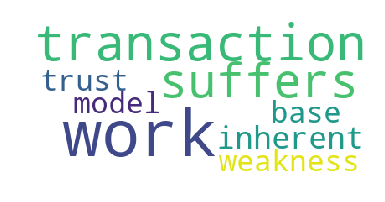

In [102]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create and generate a word cloud image:

top_1 = corpora["bitcoin"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_1)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

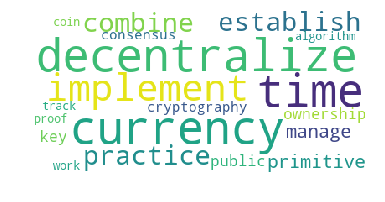

In [103]:
top_2 = corpora["ethereum"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_2)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

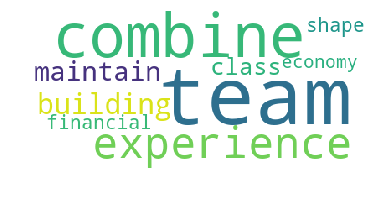

In [104]:
top_5 = corpora["binancecoin"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_5)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

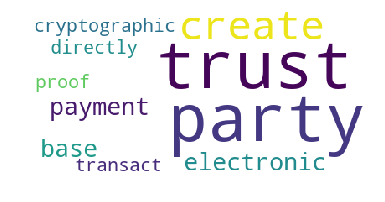

In [105]:
top_6 = corpora["tether"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_6)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

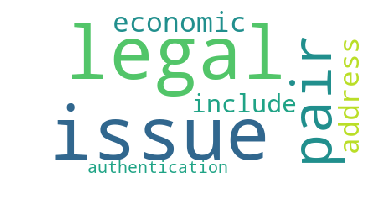

In [106]:
top_14 = corpora["ontology"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_14)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

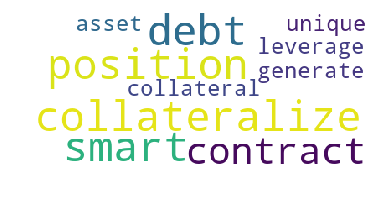

In [107]:
top_15 = corpora["maker"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_15)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

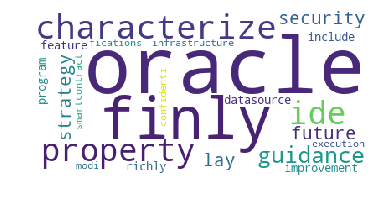

In [108]:
top_16 = corpora["chainlink"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_16)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# TFI-IDF

In [111]:
from sklearn.model_selection import train_test_split

In [128]:
df = pd.DataFrame.from_dict(corpora,orient="index").reset_index()
df.columns = ["protocol","text"]

In [129]:
df.head()

,protocol,text
0,#metahash,yellow paper technical documentation version m...
1,0x,open protocol decentralized exchange ethereum ...
2,abbccoin,concept reference purpose project summary iii ...
3,aion,white paper july aion enabling decentralized i...
4,apollocurrency,ultimate currency apollo privacy mission conte...


In [138]:
tf = TfidfVectorizer(analyzer="word", token_pattern=r"\w{1,}")
tf.fit(df["text"])


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='\\w{1,}', tokenizer=None, use_idf=True,
        vocabulary=None)

In [147]:
text_tf = tf.transform([corpora["bhpcoin"]])

In [155]:
print(text_tf)

  (0, 27338)	0.01288943413281017
  (0, 27276)	0.003449877480334004
  (0, 27127)	0.004605281363024532
  (0, 27126)	0.005872312502875506
  (0, 27125)	0.010006611573421696
  (0, 27121)	0.005964394167566594
  (0, 27064)	0.00894264754101843
  (0, 27058)	0.014797501903795324
  (0, 27057)	0.01288943413281017
  (0, 27012)	0.006981913479953439
  (0, 26952)	0.006719288662148536
  (0, 26732)	0.005964394167566594
  (0, 26622)	0.004390953457863538
  (0, 26612)	0.0262812032729912
  (0, 26590)	0.01288943413281017
  (0, 26417)	0.016771268989129163
  (0, 26357)	0.033927731637157975
  (0, 26338)	0.008416075961714689
  (0, 26295)	0.01288943413281017
  (0, 26273)	0.006480573423675193
  (0, 26270)	0.011385424493652386
  (0, 26260)	0.012160361927670893
  (0, 26161)	0.03547641030122071
  (0, 26100)	0.0049004301351633275
  (0, 26093)	0.005697310456289553
  :	:
  (0, 622)	0.007123789014033221
  (0, 581)	0.010485033945362978
  (0, 527)	0.01288943413281017
  (0, 465)	0.004053453975890298
  (0, 443)	0.00797771632

In [114]:
X_train, X_test, y_train, y_test = train_test_split(text_tf, corpora['bitcoin'], test_size=0.3, random_state=123)

In [115]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.0


In [124]:
makeSentences = False
corpora = corpus.makeCleanCorpus(dataset, lemmatize=False, removePunct=True, removeNums=True,makeSentences=makeSentences, 
                                 removeURL=True, removeChar=True, removeEnt=False)

Cleaning: #metahash


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: 0x
Cleaning: abbccoin
Cleaning: aion
Cleaning: apollocurrency
Cleaning: ardor
Cleaning: ark
Cleaning: basicattentiontoken
Cleaning: bhpcoin
Cleaning: binancecoin
Cleaning: bitcoin
Cleaning: bitcoingold
Cleaning: bitshares
Cleaning: bittorrent
Cleaning: bytecoin
Cleaning: bytom
Cleaning: celernetwork
Cleaning: chainlink
Cleaning: cosmocoin
Cleaning: cosmos
Cleaning: crypto
Cleaning: cryptonex
Cleaning: dai
Cleaning: dash
Cleaning: decentraland
Cleaning: dent
Cleaning: digixdao
Cleaning: dogecoin
Cleaning: elastos
Cleaning: enjincoin
Cleaning: eos
Cleaning: ethereum
Cleaning: ethereumclassic
Cleaning: factom
Cleaning: fantom
Cleaning: gnosis
Cleaning: golem
Cleaning: gxchain
Cleaning: holo
Cleaning: horizen
Cleaning: hypercash
Cleaning: hyperion
Cleaning: icon
Cleaning: iexecrlc
Cleaning: inocoin
Cleaning: iota
Cleaning: japancontenttoken
Cleaning: komodo
Cleaning: latoken
Cleaning: lina
Cleaning: loopring
Cleaning: maidsafecoin
Cleaning: maker
Cleaning: metal
Cleaning: metaver

In [142]:
from collections import Counter, defaultdict
import pandas as pd
import pandas as pd
temp = []
tokenizer = nltk.tokenize.RegexpTokenizer('\s+', gaps=True)
for h, c in corpora.items():
    temp.append(Counter(tokenizer.tokenize(c)))

term_count = pd.DataFrame.from_dict(temp).transpose()
term_count.columns = [s for s in list(corpora.keys())]
#term_count.reset_index(inplace=True)
term_count['sum_words'] = term_count.sum(axis = 1, skipna = True) 
term_count.fillna(0, inplace=True)
term_count.sort_values(by=['sum_words'], ascending=False).head(20)

,#metahash,0x,abbccoin,aion,apollocurrency,ardor,ark,basicattentiontoken,bhpcoin,binancecoin,...,utrust,vechain,waltonchain,wanchain,waves,wax,xrp,zcash,zilliqa,sum_words
network,174.0,12.0,14.0,166.0,1.0,16.0,91.0,5.0,33.0,1.0,...,0.0,16.0,27.0,18.0,12.0,12.0,51.0,63.0,48.0,3362.0
blockchain,35.0,25.0,15.0,122.0,26.0,107.0,105.0,11.0,16.0,9.0,...,13.0,148.0,89.0,43.0,42.0,11.0,0.0,0.0,28.0,3347.0
transaction,57.0,18.0,9.0,71.0,16.0,54.0,65.0,18.0,38.0,0.0,...,13.0,4.0,37.0,98.0,15.0,23.0,18.0,196.0,71.0,2535.0
data,77.0,8.0,6.0,25.0,5.0,20.0,30.0,43.0,22.0,11.0,...,4.0,118.0,50.0,26.0,1.0,4.0,2.0,13.0,32.0,2453.0
nodes,145.0,1.0,1.0,8.0,1.0,19.0,18.0,0.0,20.0,0.0,...,0.0,3.0,34.0,32.0,19.0,6.0,60.0,19.0,97.0,2348.0
block,64.0,8.0,6.0,8.0,4.0,41.0,20.0,4.0,38.0,0.0,...,0.0,2.0,42.0,8.0,4.0,2.0,0.0,211.0,58.0,2092.0
token,0.0,35.0,3.0,6.0,4.0,92.0,4.0,53.0,1.0,1.0,...,53.0,2.0,35.0,25.0,13.0,31.0,0.0,0.0,5.0,1857.0
users,3.0,23.0,21.0,17.0,20.0,16.0,23.0,87.0,4.0,4.0,...,3.0,9.0,7.0,4.0,4.0,50.0,9.0,7.0,6.0,1843.0
transactions,86.0,12.0,11.0,26.0,26.0,69.0,18.0,17.0,24.0,1.0,...,12.0,0.0,35.0,45.0,7.0,23.0,33.0,74.0,37.0,1803.0
bitcoin,4.0,0.0,4.0,3.0,8.0,5.0,24.0,2.0,28.0,0.0,...,6.0,2.0,11.0,11.0,9.0,3.0,1.0,92.0,9.0,1636.0


In [143]:
TF = term_count.iloc[:,2:9]/(term_count.iloc[:,2:9].sum(axis=0))

In [144]:
IDF = np.log(7/((term_count.iloc[:,2:9]/term_count.iloc[:,2:9]).sum(axis=1)))

In [145]:
TFIDF = TF.apply(lambda col: col*IDF)
TFIDF = pd.concat([term_count.iloc[:,:2],TFIDF], axis=1)
TFIDF['sum'] = TFIDF.sum(axis=1)

In [156]:
TFIDF.sort_values('sum', ascending=False).head(20)

,#metahash,0x,abbccoin,aion,apollocurrency,ardor,ark,basicattentiontoken,bhpcoin,sum
network,174.0,12.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,186.000000
nodes,145.0,1.0,0.000064,0.000259,0.000079,0.000424,0.000352,0.000000,0.001410,146.002589
node,116.0,1.0,0.000000,0.001057,0.000000,0.001378,0.001777,0.000000,0.005376,117.009589
transactions,86.0,12.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000
order,6.0,83.0,0.000128,0.000032,0.000000,0.000268,0.000137,0.000027,0.000353,89.000945
address,54.0,33.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87.000000
data,77.0,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000
transaction,57.0,18.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000
block,64.0,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000
core,69.0,1.0,0.000000,0.000194,0.000317,0.000134,0.001175,0.000080,0.000212,70.002111


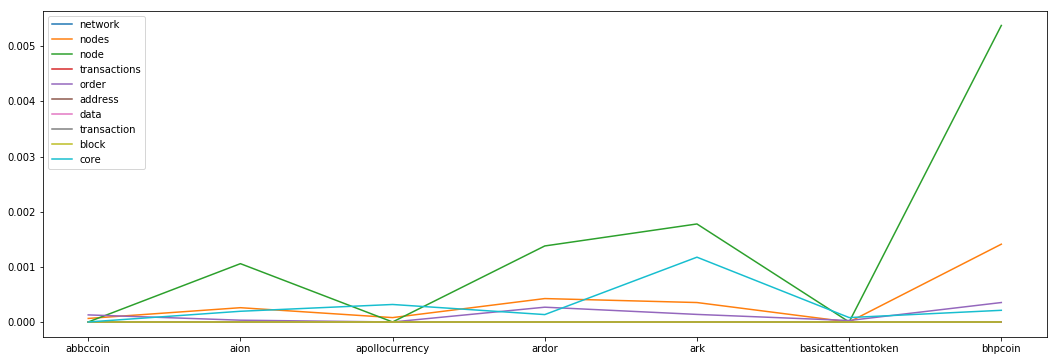

In [162]:
toPlot = TFIDF.sort_values('sum', ascending=False).head(10)
statistic = toPlot.iloc[:,2:9]
#statistic.set_index(toPlot['0x'] + ' ' + toPlot['zilliqa'], inplace=True)

toPlot = statistic.T
plt.figure(figsize=(18,6))
for c in toPlot:
    plt.plot(toPlot[c], label=toPlot[c].name)
plt.legend()
plt.show()

## Method Application

# References: 

https://www.kaggle.com/rochachan/part-1-for-beginners-bag-of-words

'Bag_of_Words_tfidf_Simple_PreProcessing.ipynb' notebook by Prof. Löcher

https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a